In [6]:
import pandas as pd
import numpy as np

# Load the messy data

df=pd.read_csv('mercedes_benz_sales_2020_2025.csv')
print(f"loaded dataset:{df.shape[0]} rows , {df.shape[1]}Columns")

loaded dataset:12132666 rows , 9Columns


In [7]:
#looking The Data
df

,Model,Year,Region,Color,Fuel Type,Base Price (USD),Horsepower,Sales Volume,Turbo
0,A-Class,2020,Global,Yellow,Diesel,41265,252,1,Yes
1,A-Class,2020,Global,Black,Petrol,51023,249,1,No
2,A-Class,2020,Global,Grey,Petrol,72819,341,1,Yes
3,A-Class,2020,Global,Black,Petrol,62480,385,1,Yes
4,A-Class,2020,Global,White,Petrol,35189,337,1,Yes
...,...,...,...,...,...,...,...,...,...
12132661,AMG S 63,2025,Global,Silver,Electric,219647,811,1,Yes
12132662,AMG S 63,2025,Global,Grey,Electric,251632,799,1,Yes
12132663,AMG S 63,2025,Global,Grey,Hybrid,260947,803,1,Yes
12132664,AMG S 63,2025,Global,Grey,Electric,311030,792,1,Yes


In [8]:
# checking necesaary information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12132666 entries, 0 to 12132665
Data columns (total 9 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   Model             object
 1   Year              int64 
 2   Region            object
 3   Color             object
 4   Fuel Type         object
 5   Base Price (USD)  int64 
 6   Horsepower        int64 
 7   Sales Volume      int64 
 8   Turbo             object
dtypes: int64(4), object(5)
memory usage: 833.1+ MB


In [9]:
#checking columan names
df.columns

Index(['Model', 'Year', 'Region', 'Color', 'Fuel Type', 'Base Price (USD)',
       'Horsepower', 'Sales Volume', 'Turbo'],
      dtype='object')

In [10]:
#Formatting column names if there is any wrong column turning every column name to lower for easy readblity
df.columns = df.columns.str.lower().str.strip().str.replace(' ','_')
print("fix applied")
df.columns

fix applied


Index(['model', 'year', 'region', 'color', 'fuel_type', 'base_price_(usd)',
       'horsepower', 'sales_volume', 'turbo'],
      dtype='object')

In [11]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_')
df = df.rename(columns={'base_price_(usd)':'base_price'})

In [12]:
#checking columan names
df.columns

Index(['model', 'year', 'region', 'color', 'fuel_type', 'base_price',
       'horsepower', 'sales_volume', 'turbo'],
      dtype='object')

In [13]:
#checking the actual size of the data 
df.shape

(12132666, 9)

In [14]:
df.head()

,model,year,region,color,fuel_type,base_price,horsepower,sales_volume,turbo
0,A-Class,2020,Global,Yellow,Diesel,41265,252,1,Yes
1,A-Class,2020,Global,Black,Petrol,51023,249,1,No
2,A-Class,2020,Global,Grey,Petrol,72819,341,1,Yes
3,A-Class,2020,Global,Black,Petrol,62480,385,1,Yes
4,A-Class,2020,Global,White,Petrol,35189,337,1,Yes


In [15]:
df.tail()

,model,year,region,color,fuel_type,base_price,horsepower,sales_volume,turbo
12132661,AMG S 63,2025,Global,Silver,Electric,219647,811,1,Yes
12132662,AMG S 63,2025,Global,Grey,Electric,251632,799,1,Yes
12132663,AMG S 63,2025,Global,Grey,Hybrid,260947,803,1,Yes
12132664,AMG S 63,2025,Global,Grey,Electric,311030,792,1,Yes
12132665,AMG S 63,2025,Global,Silver,Electric,383516,807,1,Yes


In [16]:
# checking if there is any null value and removing it 
df.isnull().sum()

model           0
year            0
region          0
color           0
fuel_type       0
base_price      0
horsepower      0
sales_volume    0
turbo           0
dtype: int64

In [17]:
if df.isnull().values.any():
        df = df.dropna()

In [18]:
df.isnull().sum()
(df.isnull().mean() * 100).sort_values(ascending=False)

model           0.0
year            0.0
region          0.0
color           0.0
fuel_type       0.0
base_price      0.0
horsepower      0.0
sales_volume    0.0
turbo           0.0
dtype: float64

In [19]:
df.duplicated().sum()


np.int64(3153)

In [20]:
# Removed duplicates 
df = df.drop_duplicates()

In [19]:
df.duplicated().sum()

np.int64(0)

In [21]:
# Basic statistics
print("\n📈 Statistical Summary:")
print(df.describe())


📈 Statistical Summary:
               year    base_price    horsepower  sales_volume
count  1.212951e+07  1.212951e+07  1.212951e+07    12129513.0
mean   2.022548e+03  1.042226e+05  3.674664e+02           1.0
std    1.658897e+00  6.783929e+04  1.195476e+02           0.0
min    2.020000e+03  3.500000e+04  1.500000e+02           1.0
25%    2.021000e+03  6.346400e+04  2.750000e+02           1.0
50%    2.023000e+03  8.357400e+04  3.580000e+02           1.0
75%    2.024000e+03  1.199280e+05  4.440000e+02           1.0
max    2.025000e+03  4.112460e+05  8.310000e+02           1.0


In [21]:
# Additional info for categorical columns
print("\n📊 Categorical Columns Summary:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    print(f"  - Unique Values: {df[col].nunique()}")
    print(f"  - Most Common: {df[col].mode()[0]} ({df[col].value_counts().iloc[0]:,} times)")


📊 Categorical Columns Summary:

model:
  - Unique Values: 17
  - Most Common: GLC (2,090,446 times)

region:
  - Unique Values: 1
  - Most Common: Global (12,129,513 times)

color:
  - Unique Values: 10
  - Most Common: Black (3,030,460 times)

fuel_type:
  - Unique Values: 4
  - Most Common: Petrol (5,819,263 times)

turbo:
  - Unique Values: 2
  - Most Common: Yes (10,368,236 times)


In [23]:
outlier_report = {}

for col in df.select_dtypes(include=np.number).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    mask = (df[col] < lower) | (df[col] > upper)
    df[f"{col}_is_outlier"] = mask.astype(int)

    outlier_report[col] = {
        "outlier_count": mask.sum(),
        "outlier_percent": round(mask.mean() * 100, 2)
    }

pd.DataFrame(outlier_report).T

,outlier_count,outlier_percent
year,0.0,0.00
base_price,1010454.0,8.33
horsepower,148235.0,1.22
sales_volume,0.0,0.00


In [24]:
# Price segmentation for visualization
bins = [0, 40000, 70000, 120000, float("inf")]
labels = ["Economy", "Premium", "Luxury", "Ultra Luxury"]

df["price_category"] = pd.cut(
    df["base_price"],
    bins=bins,
    labels=labels,
    include_lowest=True
)

df["price_category"].value_counts()


price_category
Luxury          5141892
Premium         3704976
Ultra Luxury    3029654
Economy          252991
Name: count, dtype: int64

In [25]:
print("\n" + "="*80)
print("KEY INSIGHTS SUMMARY")
print("="*80)

print("\n🎯 KEY FINDINGS FROM EDA:")
print("-" * 80)

# Insight 1: Overall data quality
print("\n1️⃣ DATA QUALITY:")
print(f"   ✓ Total Records: {len(df):,}")
print(f"   ✓ Missing Values: {df.isnull().sum().sum()} ({df.isnull().sum().sum()/df.size*100:.2f}%)")
print(f"   ✓ Duplicates: {df.duplicated().sum():,}")
print(f"   ✓ Time Period: {df['Year'].min() if 'Year' in df.columns else 'N/A'} - {df['Year'].max() if 'Year' in df.columns else 'N/A'}")


print("\n" + "="*80)
print("EDA COMPLETED SUCCESSFULLY! ✅")
print("="*80)



KEY INSIGHTS SUMMARY

🎯 KEY FINDINGS FROM EDA:
--------------------------------------------------------------------------------

1️⃣ DATA QUALITY:
   ✓ Total Records: 12,129,513
   ✓ Missing Values: 0 (0.00%)
   ✓ Duplicates: 0
   ✓ Time Period: N/A - N/A

EDA COMPLETED SUCCESSFULLY! ✅


In [26]:
print("\n" + "="*80)
print("some visualization")
print("="*80)


some visualization


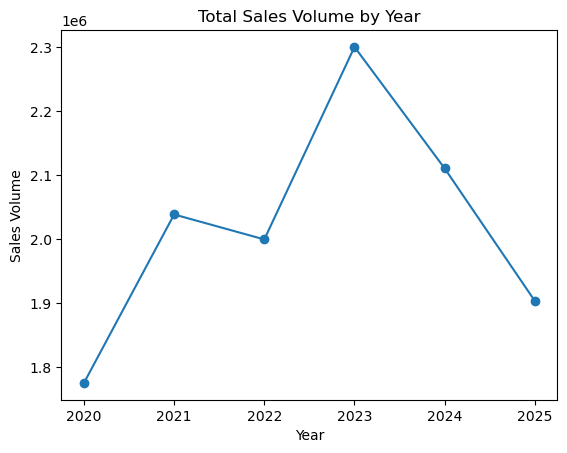

In [27]:
import matplotlib.pyplot as plt

sales_by_year = df.groupby("year")["sales_volume"].sum()

sales_by_year.plot(kind="line", marker="o")
plt.title("Total Sales Volume by Year")
plt.xlabel("Year")
plt.ylabel("Sales Volume")
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_22796\2845583587.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_sales = df.groupby("price_category")["sales_volume"].sum()


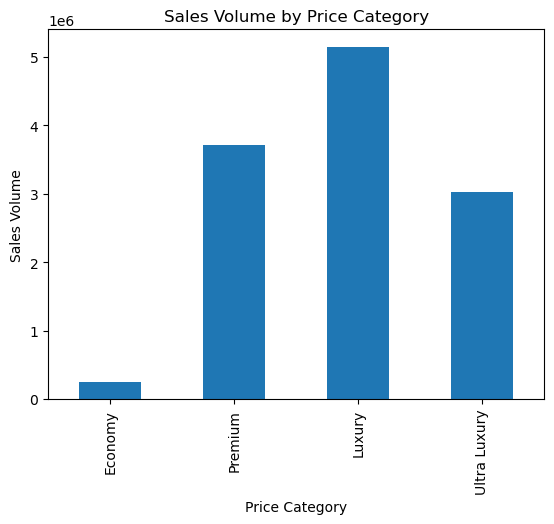

In [28]:
price_sales = df.groupby("price_category")["sales_volume"].sum()

price_sales.plot(kind="bar")
plt.title("Sales Volume by Price Category")
plt.xlabel("Price Category")
plt.ylabel("Sales Volume")
plt.show()


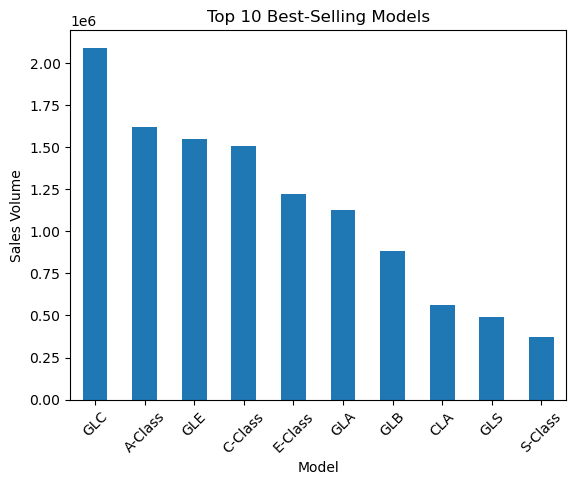

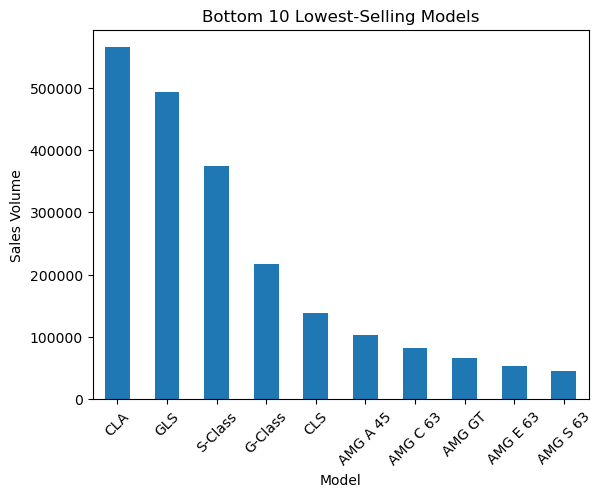

In [29]:
model_sales = (
    df.groupby("model")["sales_volume"]
    .sum()
    .sort_values(ascending=False)
)

# Top 10 models
model_sales.head(10).plot(kind="bar")
plt.title("Top 10 Best-Selling Models")
plt.xlabel("Model")
plt.ylabel("Sales Volume")
plt.xticks(rotation=45)
plt.show()

# Bottom 10 models
model_sales.tail(10).plot(kind="bar")
plt.title("Bottom 10 Lowest-Selling Models")
plt.xlabel("Model")
plt.ylabel("Sales Volume")
plt.xticks(rotation=45)
plt.show()


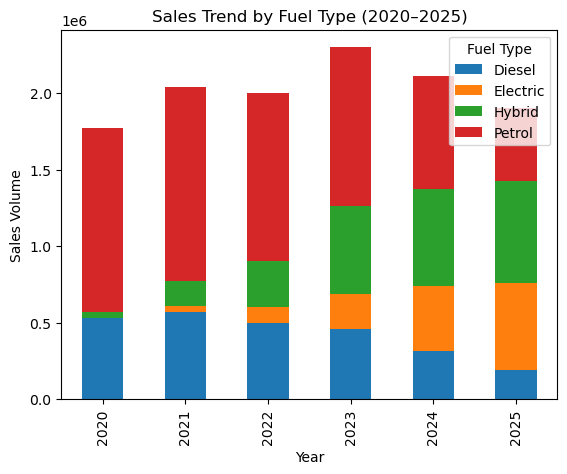

In [30]:
fuel_trend = (
    df.groupby(["year", "fuel_type"])["sales_volume"]
    .sum()
    .unstack()
)

fuel_trend.plot(kind="bar", stacked=True)
plt.title("Sales Trend by Fuel Type (2020–2025)")
plt.xlabel("Year")
plt.ylabel("Sales Volume")
plt.legend(title="Fuel Type")
plt.show()


In [40]:
import pandas as pd
from sqlalchemy import create_engine
from urllib.parse import quote_plus

# create a databse in sqlserver first 
# SQL Server details
server = r"DESKTOP-BDSN4BM\SQLEXPRESS"
database = "Mercedes"

# ODBC Driver
driver = quote_plus("ODBC Driver 17 for SQL Server")

# Create engine using Windows Authentication
engine = create_engine(
    f"mssql+pyodbc://@{server}/{database}?driver={driver}&trusted_connection=yes"
)

# Write DataFrame to SQL Server
df.to_sql(
    "Sales",  # Changed table name
    engine,
    if_exists="replace",
    index=False,
    chunksize=500
)

print("✅ Data successfully written to SQL Server")

# Read back sample data - FIXED table name to match what we wrote
pd.read_sql("SELECT TOP 5 * FROM Sales", engine)

E:\anaconda\Lib\site-packages\pandas\io\sql.py:1648: SAWarning: Unrecognized server version info '17.0.1000.7'.  Some SQL Server features may not function properly.
  con = self.exit_stack.enter_context(con.connect())


✅ Data successfully written to SQL Server


,model,year,region,color,fuel_type,base_price,horsepower,sales_volume,turbo,year_is_outlier,base_price_is_outlier,horsepower_is_outlier,sales_volume_is_outlier,price_category
0,A-Class,2020,Global,Yellow,Diesel,41265,252,1,Yes,0,0,0,0,Premium
1,A-Class,2020,Global,Black,Petrol,51023,249,1,No,0,0,0,0,Premium
2,A-Class,2020,Global,Grey,Petrol,72819,341,1,Yes,0,0,0,0,Luxury
3,A-Class,2020,Global,Black,Petrol,62480,385,1,Yes,0,0,0,0,Premium
4,A-Class,2020,Global,White,Petrol,35189,337,1,Yes,0,0,0,0,Economy


In [31]:
# ==========================================
# EXPORT CLEANED DATA TO CSV
# ==========================================

# File name you want
file_name = "mercedes_cleaned.csv"

# Export dataframe
df.to_csv(file_name, index=False)

print("✅ Cleaned data exported successfully!")
print(f"📁 File saved as: {file_name}")

✅ Cleaned data exported successfully!
📁 File saved as: mercedes_cleaned.csv
